# Advance Regression and Classification

The data is taken from here: https://www.kaggle.com/c/dsi-regression/data

Both the regression and classification had the same data.

In [1]:
#importing the libraries
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Load the train and test data
df=pd.read_csv('./trainc.csv')
test_data=pd.read_csv('./testc.csv')

### EDA

In [3]:
# taking out the spaces from the column names
df.columns = df.columns.str.replace(' ', '')

In [4]:
df.head(5)

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,0,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,0,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,1,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,0,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,0,138500


In [5]:
df.shape

(2051, 82)

In [6]:
# we can see many columns containing missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
Id               2051 non-null int64
PID              2051 non-null int64
MSSubClass       2051 non-null int64
MSZoning         2051 non-null object
LotFrontage      1721 non-null float64
LotArea          2051 non-null int64
Street           2051 non-null object
Alley            140 non-null object
LotShape         2051 non-null object
LandContour      2051 non-null object
Utilities        2051 non-null object
LotConfig        2051 non-null object
LandSlope        2051 non-null object
Neighborhood     2051 non-null object
Condition1       2051 non-null object
Condition2       2051 non-null object
BldgType         2051 non-null object
HouseStyle       2051 non-null object
OverallQual      2051 non-null int64
OverallCond      2051 non-null int64
YearBuilt        2051 non-null int64
YearRemod/Add    2051 non-null int64
RoofStyle        2051 non-null object
RoofMatl         2051 non-n

In [7]:
# checking the columns with missing data
df.columns[df.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
# veiwing the missing values for each columns
df.isna().sum()[df.isna().sum()!=0]

LotFrontage      330
Alley           1911
MasVnrType        22
MasVnrArea        22
BsmtQual          55
BsmtCond          55
BsmtExposure      58
BsmtFinType1      55
BsmtFinSF1         1
BsmtFinType2      56
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
FireplaceQu     1000
GarageType       113
GarageYrBlt      114
GarageFinish     114
GarageCars         1
GarageArea         1
GarageQual       114
GarageCond       114
PoolQC          2042
Fence           1651
MiscFeature     1986
dtype: int64

In [9]:
# after careful reading about the data it seems most of the missing values contain meaning like not having a basement
# that being said these are important information, i will replace missing data in alley with no-access
df.Alley.fillna('no-access', inplace=True) 

# next i will replace the missing values in basement related columns with no basement
df.BsmtQual.fillna('no-Basement', inplace=True) 
df.BsmtCond.fillna('no-Basement', inplace=True) 
df.BsmtExposure.fillna('no-Basement', inplace=True) 
df.BsmtFinType1.fillna('no-Basement', inplace=True) 
df.BsmtFinType2.fillna('no-Basement', inplace=True)

# replace missing area of basement with zero if non-existing
df.BsmtFinSF1.fillna(0, inplace=True) 

# replacing the missing data in fireplacequ with no-fireplace
df.FireplaceQu.fillna('no-Fireplace', inplace=True) 

# replacing the garage missing values with no-garage while area with 0
df.GarageType.fillna('no-Garage', inplace=True) 
df.GarageFinish.fillna('no-Garage', inplace=True) 
df.GarageCars.fillna(0, inplace=True)
df.GarageQual.fillna('no-Garage', inplace=True)
df.GarageCond.fillna('no-Garage', inplace=True)

# replacing missing values within the pool and fence with no pool nor fence
df.PoolQC.fillna('no-pool', inplace=True)
df.Fence.fillna('no-Fence', inplace=True)
df.MiscFeature.fillna('None', inplace=True)



In [10]:
# checking the missing values after filling a bit
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
Id               2051 non-null int64
PID              2051 non-null int64
MSSubClass       2051 non-null int64
MSZoning         2051 non-null object
LotFrontage      1721 non-null float64
LotArea          2051 non-null int64
Street           2051 non-null object
Alley            2051 non-null object
LotShape         2051 non-null object
LandContour      2051 non-null object
Utilities        2051 non-null object
LotConfig        2051 non-null object
LandSlope        2051 non-null object
Neighborhood     2051 non-null object
Condition1       2051 non-null object
Condition2       2051 non-null object
BldgType         2051 non-null object
HouseStyle       2051 non-null object
OverallQual      2051 non-null int64
OverallCond      2051 non-null int64
YearBuilt        2051 non-null int64
YearRemod/Add    2051 non-null int64
RoofStyle        2051 non-null object
RoofMatl         2051 non-

In [11]:
df.shape

(2051, 82)

In [12]:
df.MasVnrType.isna().sum()

22

In [13]:
# droping all the na
df.dropna(axis=0, how='any').shape

# we can see lot of our data been taken lets try to fill with minimuim error

(1596, 82)

In [14]:
df.MasVnrType.isna().sum()

22

In [15]:
# replacing the numerical columns from the no-basement with zeros
df.loc[df.BsmtQual == 'no-Basement', ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = 0

In [16]:
# replacing the columns with no Masonry veneer with zeros and nones
df.loc[df['MasVnrType'].isnull(), 'MasVnrArea'] = 0
df.loc[df['MasVnrType'].isnull(), 'MasVnrType'] = 'None'
df.loc[df['MasVnrArea'] == 0, 'MasVnrType'] = 'None'
df.loc[df['MasVnrType'] == 'None', 'MasVnrArea'] = 0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


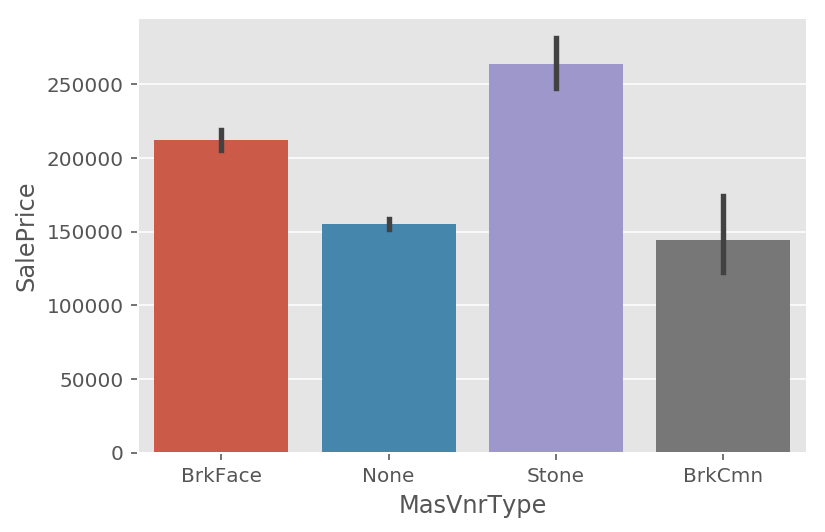

In [17]:
# we can see the price of none is similar to brkcmn
sns.barplot(x=df.MasVnrType,y=df.SalePrice)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


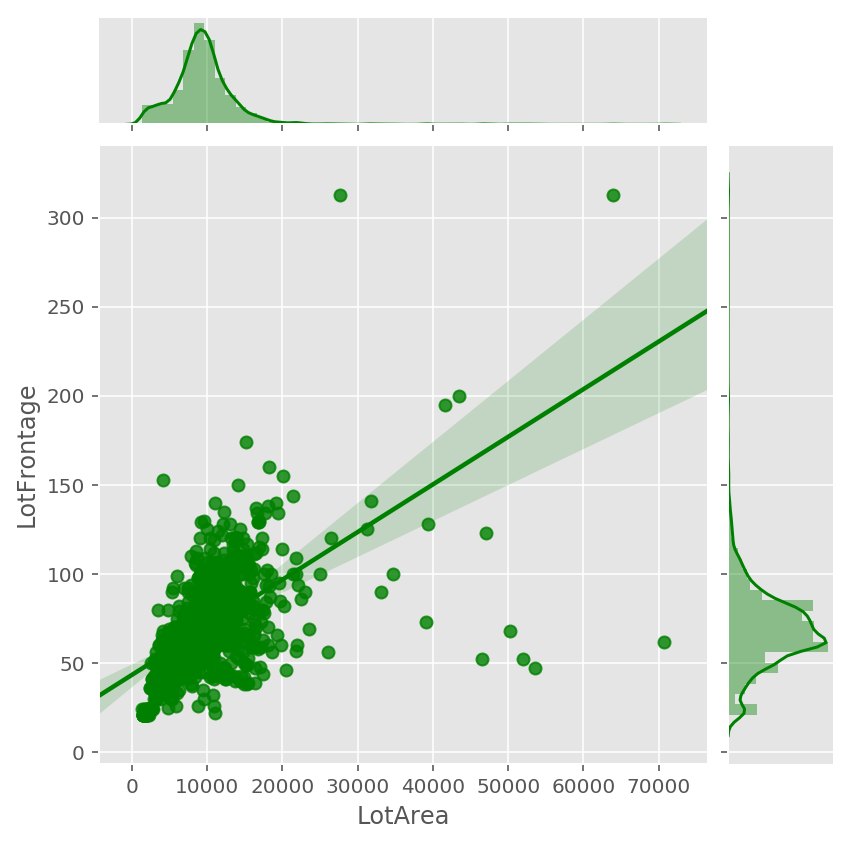

In [18]:
# we can see the great correlation between the two
sns.jointplot(data=df,x='LotArea',y='LotFrontage',kind='reg',color='g')

In [19]:
# we can see the LotFrontage having high correlation with LotArea so replacing the missing values according to LotArea may resualt in a very good estimation
df.sort_values(['LotArea','1stFlrSF','MSSubClass'],inplace=True)
df.LotFrontage.fillna(method='ffill',inplace=True)


In [20]:
# replacing the no garage with zeros for numeric columns
df.loc[df['GarageCond']=='no-Garage','GarageYrBlt']=0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


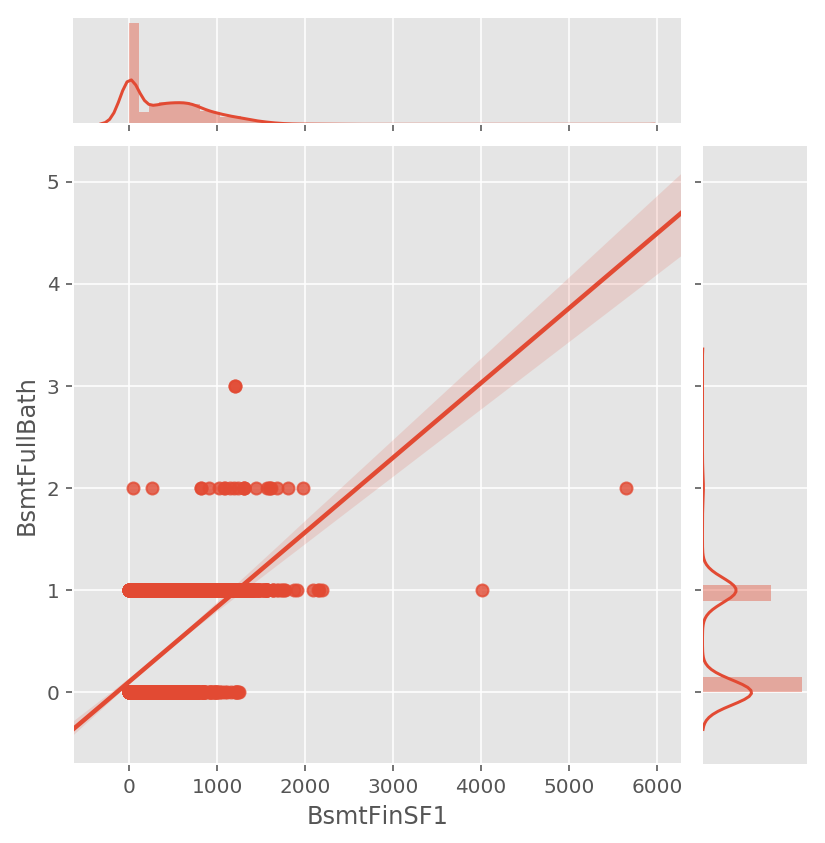

In [21]:
sns.jointplot(data=df,x='BsmtFinSF1',y='BsmtFullBath',kind='reg')

In [22]:
# replacing the missing values with most correlated columns though it's merely two data points so it won't have effect 
df.sort_values(['BsmtFinSF1','BsmtUnfSF'],inplace=True)
df.BsmtFullBath.fillna(method='ffill',inplace=True)
df.BsmtHalfBath.fillna(method='ffill',inplace=True)

In [23]:
# replacing the no garage area with zeros
df.loc[df.GarageArea.isnull(),'GarageArea']=0

In [24]:
# checking columns for numeric before converting it to floats
df=df.applymap(lambda x: float(x) if str.isdigit(str(x)) else x)

In [25]:
# the data is all clean now
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 1428 to 960
Data columns (total 82 columns):
Id               2051 non-null float64
PID              2051 non-null float64
MSSubClass       2051 non-null float64
MSZoning         2051 non-null object
LotFrontage      2051 non-null float64
LotArea          2051 non-null float64
Street           2051 non-null object
Alley            2051 non-null object
LotShape         2051 non-null object
LandContour      2051 non-null object
Utilities        2051 non-null object
LotConfig        2051 non-null object
LandSlope        2051 non-null object
Neighborhood     2051 non-null object
Condition1       2051 non-null object
Condition2       2051 non-null object
BldgType         2051 non-null object
HouseStyle       2051 non-null object
OverallQual      2051 non-null float64
OverallCond      2051 non-null float64
YearBuilt        2051 non-null float64
YearRemod/Add    2051 non-null float64
RoofStyle        2051 non-null object
RoofMatl

In [26]:
# save the data into local file to tinker with it later
#df.to_csv('very_clean_train.csv',index=False)

In [27]:
# redundant columns investigation
all_columns=pd.get_dummies(df,drop_first=False)
# take only data with 0.1 or more absolute value correlation 
final_columns=list(abs(all_columns.corr()[abs(all_columns.corr()['SalePrice'])>0.1]['SalePrice']).index)
len(final_columns)

150

In [28]:
# function that remove redundant columns
def removing_redundants(df,columns,target='SalePrice'):
    df=df[columns].corr()
    column=list(df.columns)
    index=list(df.index)
    non=columns
    for i in index:
        for c in column:
            if i==c:
                continue
            elif i==target or c==target:
                continue
            elif abs(df.loc[i,c]) >= 0.9:
                if abs(df.loc[i,target]) >= abs(df.loc[c,target]) and (c in non):
                    non.remove(c)
                elif i in non:
                    non.remove(i)
    return non

nonredundant_columns=removing_redundants(all_columns,final_columns)
len(nonredundant_columns)

131

In [29]:
final_data=all_columns[['Id']+nonredundant_columns]


In [30]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 1428 to 960
Columns: 132 entries, Id to SaleType_WD 
dtypes: float64(29), uint8(103)
memory usage: 687.0 KB


In [31]:
# checking correlation
abs(final_data.corr()['SalePrice']).nlargest(20)

SalePrice           1.000000
OverallQual         0.800207
GrLivArea           0.697038
GarageArea          0.649897
GarageCars          0.647781
TotalBsmtSF         0.629303
1stFlrSF            0.618486
ExterQual_TA        0.600362
BsmtQual_Ex         0.586497
YearBuilt           0.571849
KitchenQual_Ex      0.551284
YearRemod/Add       0.550370
KitchenQual_TA      0.540860
FullBath            0.537969
Foundation_PConc    0.529047
TotRmsAbvGrd        0.504014
MasVnrArea          0.503529
ExterQual_Ex        0.493861
BsmtFinType1_GLQ    0.463549
BsmtQual_TA         0.456979
Name: SalePrice, dtype: float64

In [32]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 1428 to 960
Columns: 132 entries, Id to SaleType_WD 
dtypes: float64(29), uint8(103)
memory usage: 687.0 KB


# Modeling for the Regression task.

In [87]:
# reading the saved training and testing data
df=pd.read_csv('very_clean_train.csv')
testing_set=pd.read_csv('very_clean_test.csv')
testing_set.drop('PID',axis=1,inplace=True)
df.drop(['PID','Id'],axis=1,inplace=True)

# detecting outliers
def detect_outlier(data_1):
    outliers=[]
    threshold=6
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

outliers=detect_outlier(df.SalePrice)
df=df[~df.SalePrice.isin(outliers)]
outliers

[]

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# dummifying the categorical columns
train_df=pd.get_dummies(df)
testing=pd.get_dummies(testing_set,drop_first=True)

# taking the columns with correlation higher than 0.1 and applying the removing redundants equation 
columns=list(abs(train_df.corr()[abs(train_df.corr()['SalePrice'])>0.1]['SalePrice']).index)
columns=removing_redundants(train_df,columns)
train_df=train_df[columns]




In [89]:
# taking only the columns existing in both train and test data
def fixing_columns(train_df,testing):
    train_test_columns=[]
    for i in list(testing.columns):
        if i in list(train_df.columns) and i not in train_test_columns:
            train_test_columns.append(i)
    return train_test_columns
train_test_columns=fixing_columns(train_df,testing)

In [90]:
# taking only the columns existing in both train and test data
train_df=train_df[train_test_columns+['SalePrice']]
testing=testing[['Id']+train_test_columns]

In [91]:
# applying a log scaling since we have many skewed columns
X=np.log2(train_df.drop(['SalePrice'],axis=1)+1)
y=train_df['SalePrice']

# splitting the training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11037,shuffle=True)


In [38]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import Lasso,PassiveAggressiveRegressor,LassoCV

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Grid search for the best parameters
param={"n_estimators": np.int_(np.linspace(500,5000,10)),
       "learning_rate":np.linspace(0.01,0.1,10)}
m1=GradientBoostingRegressor(min_samples_split=0.22,min_impurity_decrease=4)
grid=GridSearchCV(estimator=m1,param_grid=param,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)
grid.fit(X,y)
grid.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.08, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=4,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=0.22, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [92]:
# taking the best parameters and crossvalidate with it
m1=grid.best_estimator_
cv=cross_val_score(m1,X,y,cv=5,scoring='neg_mean_squared_error')
print('Cross-validation RMSE:',np.sqrt(np.abs(cv)).mean())


Cross-validation RMSE: 27598.448947219596


In [93]:
# testing the model
m1.fit(X_train,y_train)
print('training           r2:',m1.score(X_train,y_train))
print('test               r2:',m1.score(X_test,y_test))
print('training         rmse:',np.sqrt(mean_squared_error(y_train,m1.predict(X_train))))
print('testing          rmse:',np.sqrt(mean_squared_error(y_test,m1.predict(X_test))))

training           r2: 0.9716602705074219
test               r2: 0.9218040861585906
training         rmse: 13251.737665382816
testing          rmse: 22718.064704814784


In [94]:
# making the submission file for Kaggle
submit_file=pd.concat([pd.DataFrame(testing['Id']),pd.DataFrame(m1.predict(np.log2(testing.drop('Id',axis=1)+1)))],axis=1)
submit_file.columns=['ID','SalePrice']
submit_file.ID=submit_file.ID.astype('Int32')
submit_file.head()


,ID,SalePrice
0,1344,104486.982061
1,2680,84556.294784
2,1220,74778.036179
3,2185,83386.827200
4,1969,114009.230950


In [95]:
# saving file to submit for regression
submit_file.to_csv('submit_reg.csv',index=False)
submit_file.head()


,ID,SalePrice
0,1344,104486.982061
1,2680,84556.294784
2,1220,74778.036179
3,2185,83386.827200
4,1969,114009.230950


# Modeling for Classification task

In [109]:
# reading the saved training and testing data
df=pd.read_csv('very_clean_train.csv')
testing_set=pd.read_csv('very_clean_test.csv')
testing_set.drop('PID',axis=1,inplace=True)
df.drop(['PID','Id'],axis=1,inplace=True)
def detect_outlier(data_1):
    outliers=[]
    threshold=8
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

# detecting outliers
outliers=detect_outlier(df.SalePrice)
df=df[~df.SalePrice.isin(outliers)]
outliers

[]

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# dummifying the categorical columns
train_df=pd.get_dummies(df)
testing=pd.get_dummies(testing_set,drop_first=True)

# taking the columns with correlation higher than 0.1 and applying the removing redundants equation 
columns=list(abs(train_df.corr()[abs(train_df.corr()['SaleCondition'])>0.1]['SaleCondition']).index)
columns=removing_redundants(train_df,columns,target='SaleCondition')
train_df=train_df[columns]


In [111]:
# taking only the columns existing in both train and test data
def fixing_columns(train_df,testing):
    train_test_columns=[]
    for i in list(testing.columns):
        if i in list(train_df.columns) and i not in train_test_columns:
            train_test_columns.append(i)
    return train_test_columns
train_test_columns=fixing_columns(train_df,testing)

In [112]:
# taking only the columns existing in both train and test data
train_df=train_df[train_test_columns+['SaleCondition']]
testing=testing[['Id']+train_test_columns]

In [113]:
# applying a log scaling since we have many skewed columns
X=np.log2(train_df.drop(['SaleCondition'],axis=1)+1)
y=train_df['SaleCondition']

# splitting the training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11037,shuffle=True)


In [114]:
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,IsolationForest
from sklearn.svm import SVC,OneClassSVM
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,f1_score,confusion_matrix
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import Lasso,PassiveAggressiveRegressor,LassoCV
from imblearn.over_sampling import SMOTE

# applying oversampling since we have a severe imbalance issue
m0=SMOTE()
X_r, y_r=m0.fit_resample(X,y)
X_res, y_res=m0.fit_resample(X_train,y_train)

m2=GradientBoostingClassifier(max_depth=2,n_estimators=2000,min_samples_split=0.23,min_impurity_decrease=4,learning_rate=0.05)

In [49]:
from sklearn.model_selection import StratifiedKFold
from evolutionary_search import EvolutionaryAlgorithmSearchCV
import random

param={"n_estimators": np.int_(np.linspace(500,5000,10)),
       "learning_rate":np.linspace(0.01,0.1,10)}
grid2=GridSearchCV(estimator=m2,param_grid=param,scoring='f1',cv=5,n_jobs=-1)
grid2.fit(X_r,y_r)
grid2.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.04000000000000001, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=4, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=0.23,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [115]:
m2=grid2.best_estimator_
cv=cross_val_score(m2,X_r,y_r,cv=5,scoring='f1')
print('Cross-validation f1:',cv.mean())

Cross-validation f1: 0.7878980657450951


In [117]:
# testing the model
m2=grid2.best_estimator_
m2.fit(X_res,y_res)
print('training f1_score:',f1_score(y_train,m2.predict(X_train)))
print('testing  f1_score:',f1_score(y_test,m2.predict(X_test)))
print(confusion_matrix(y_test,m2.predict(X_test)))

training f1_score: 0.2925373134328358
testing  f1_score: 0.24657534246575344
[[347  36]
 [ 19   9]]


In [118]:
# making the submission file for Kaggle
submit_file=pd.concat([pd.DataFrame(testing['Id']),pd.DataFrame(m2.predict(np.log2(testing.drop('Id',axis=1)+1)))],axis=1)
submit_file.columns=['ID','SaleCondition']
submit_file.ID=submit_file.ID.astype('Int32')
submit_file.SaleCondition=submit_file.SaleCondition.astype('Int32')
submit_file.head()

,ID,SaleCondition
0,1344,0
1,2680,1
2,1220,1
3,2185,1
4,1969,0


In [119]:
# saving file to submit for regression
submit_file.to_csv('submit_cla.csv',index=False)
submit_file.head()

,ID,SaleCondition
0,1344,0
1,2680,1
2,1220,1
3,2185,1
4,1969,0
